In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load dataset


df = pd.read_csv("Dataset/spambase_csv.csv")
print(df.shape)
print(df.head())
print(df.describe())


(4601, 58)
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00  

In [3]:
#Missing Values

print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [4]:
#Target

print(df['class'].nunique())
print(df['class'].unique())


2
[1 0]


In [5]:
#Duplicate
df.duplicated().sum()

391

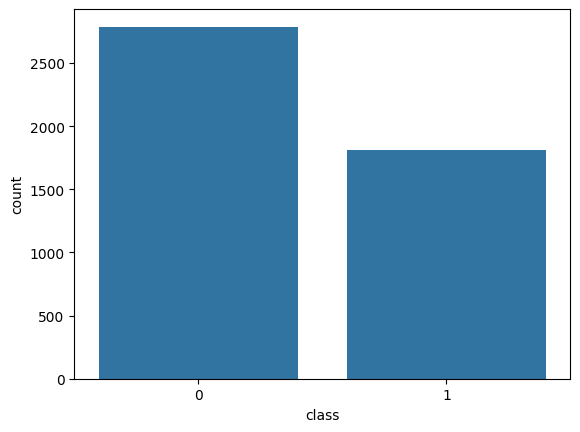

<Axes: ylabel='count'>

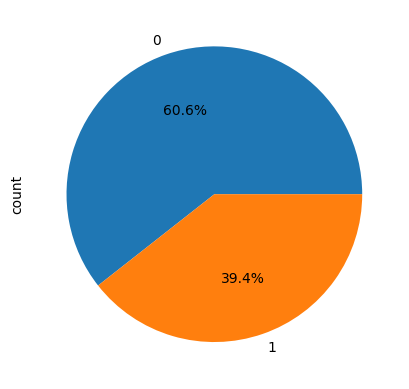

In [6]:
#target Class Distribution

sns.countplot(x='class', data=df)
plt.show()
df['class'].value_counts().plot.pie(autopct='%1.1f%%')


In [7]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


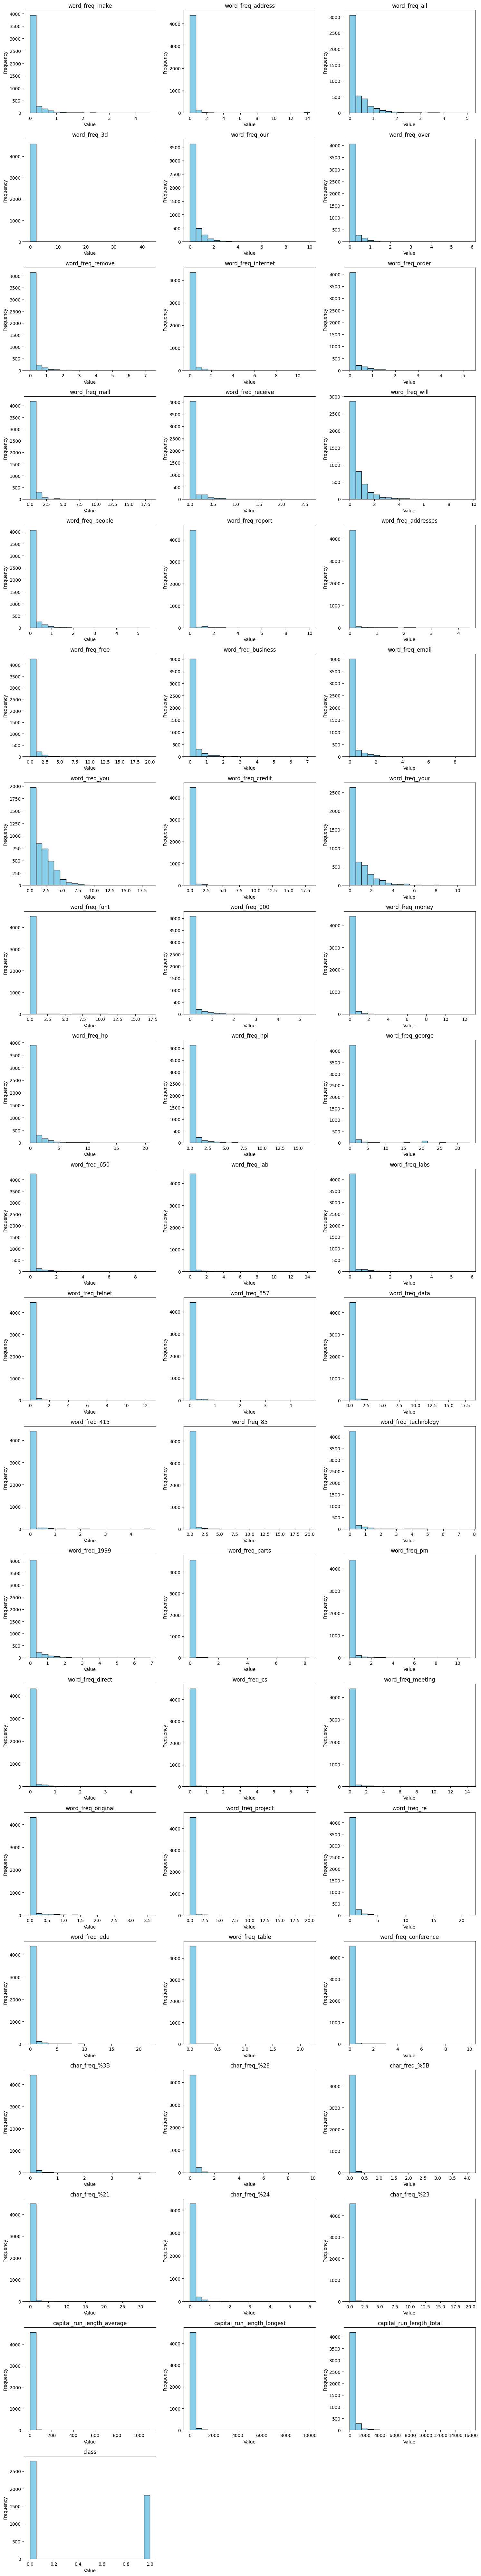

In [8]:
#Numeric Features
#Histogram

num_cols = len(df.columns)


n_cols = 3
n_rows = (num_cols + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('Value')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

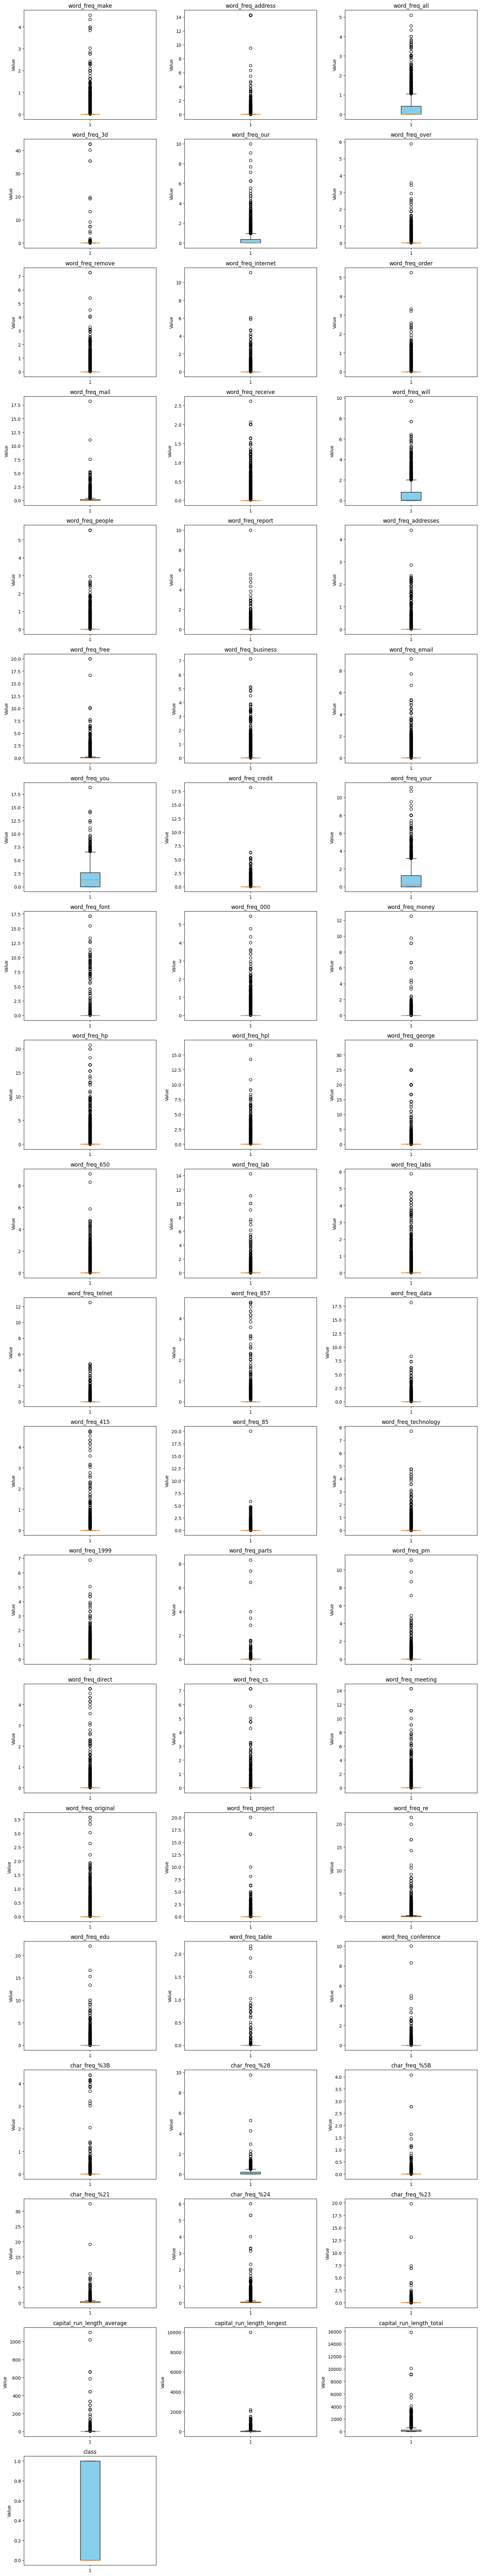

In [9]:
#Boxplot

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numeric_cols)

# Define subplot grid size
n_cols = 3  # number of plots per row
n_rows = (num_cols + n_cols - 1) // n_cols  # ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

# Plot boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='skyblue'))
    axes[i].set_title(col)
    axes[i].set_ylabel('Value')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: >

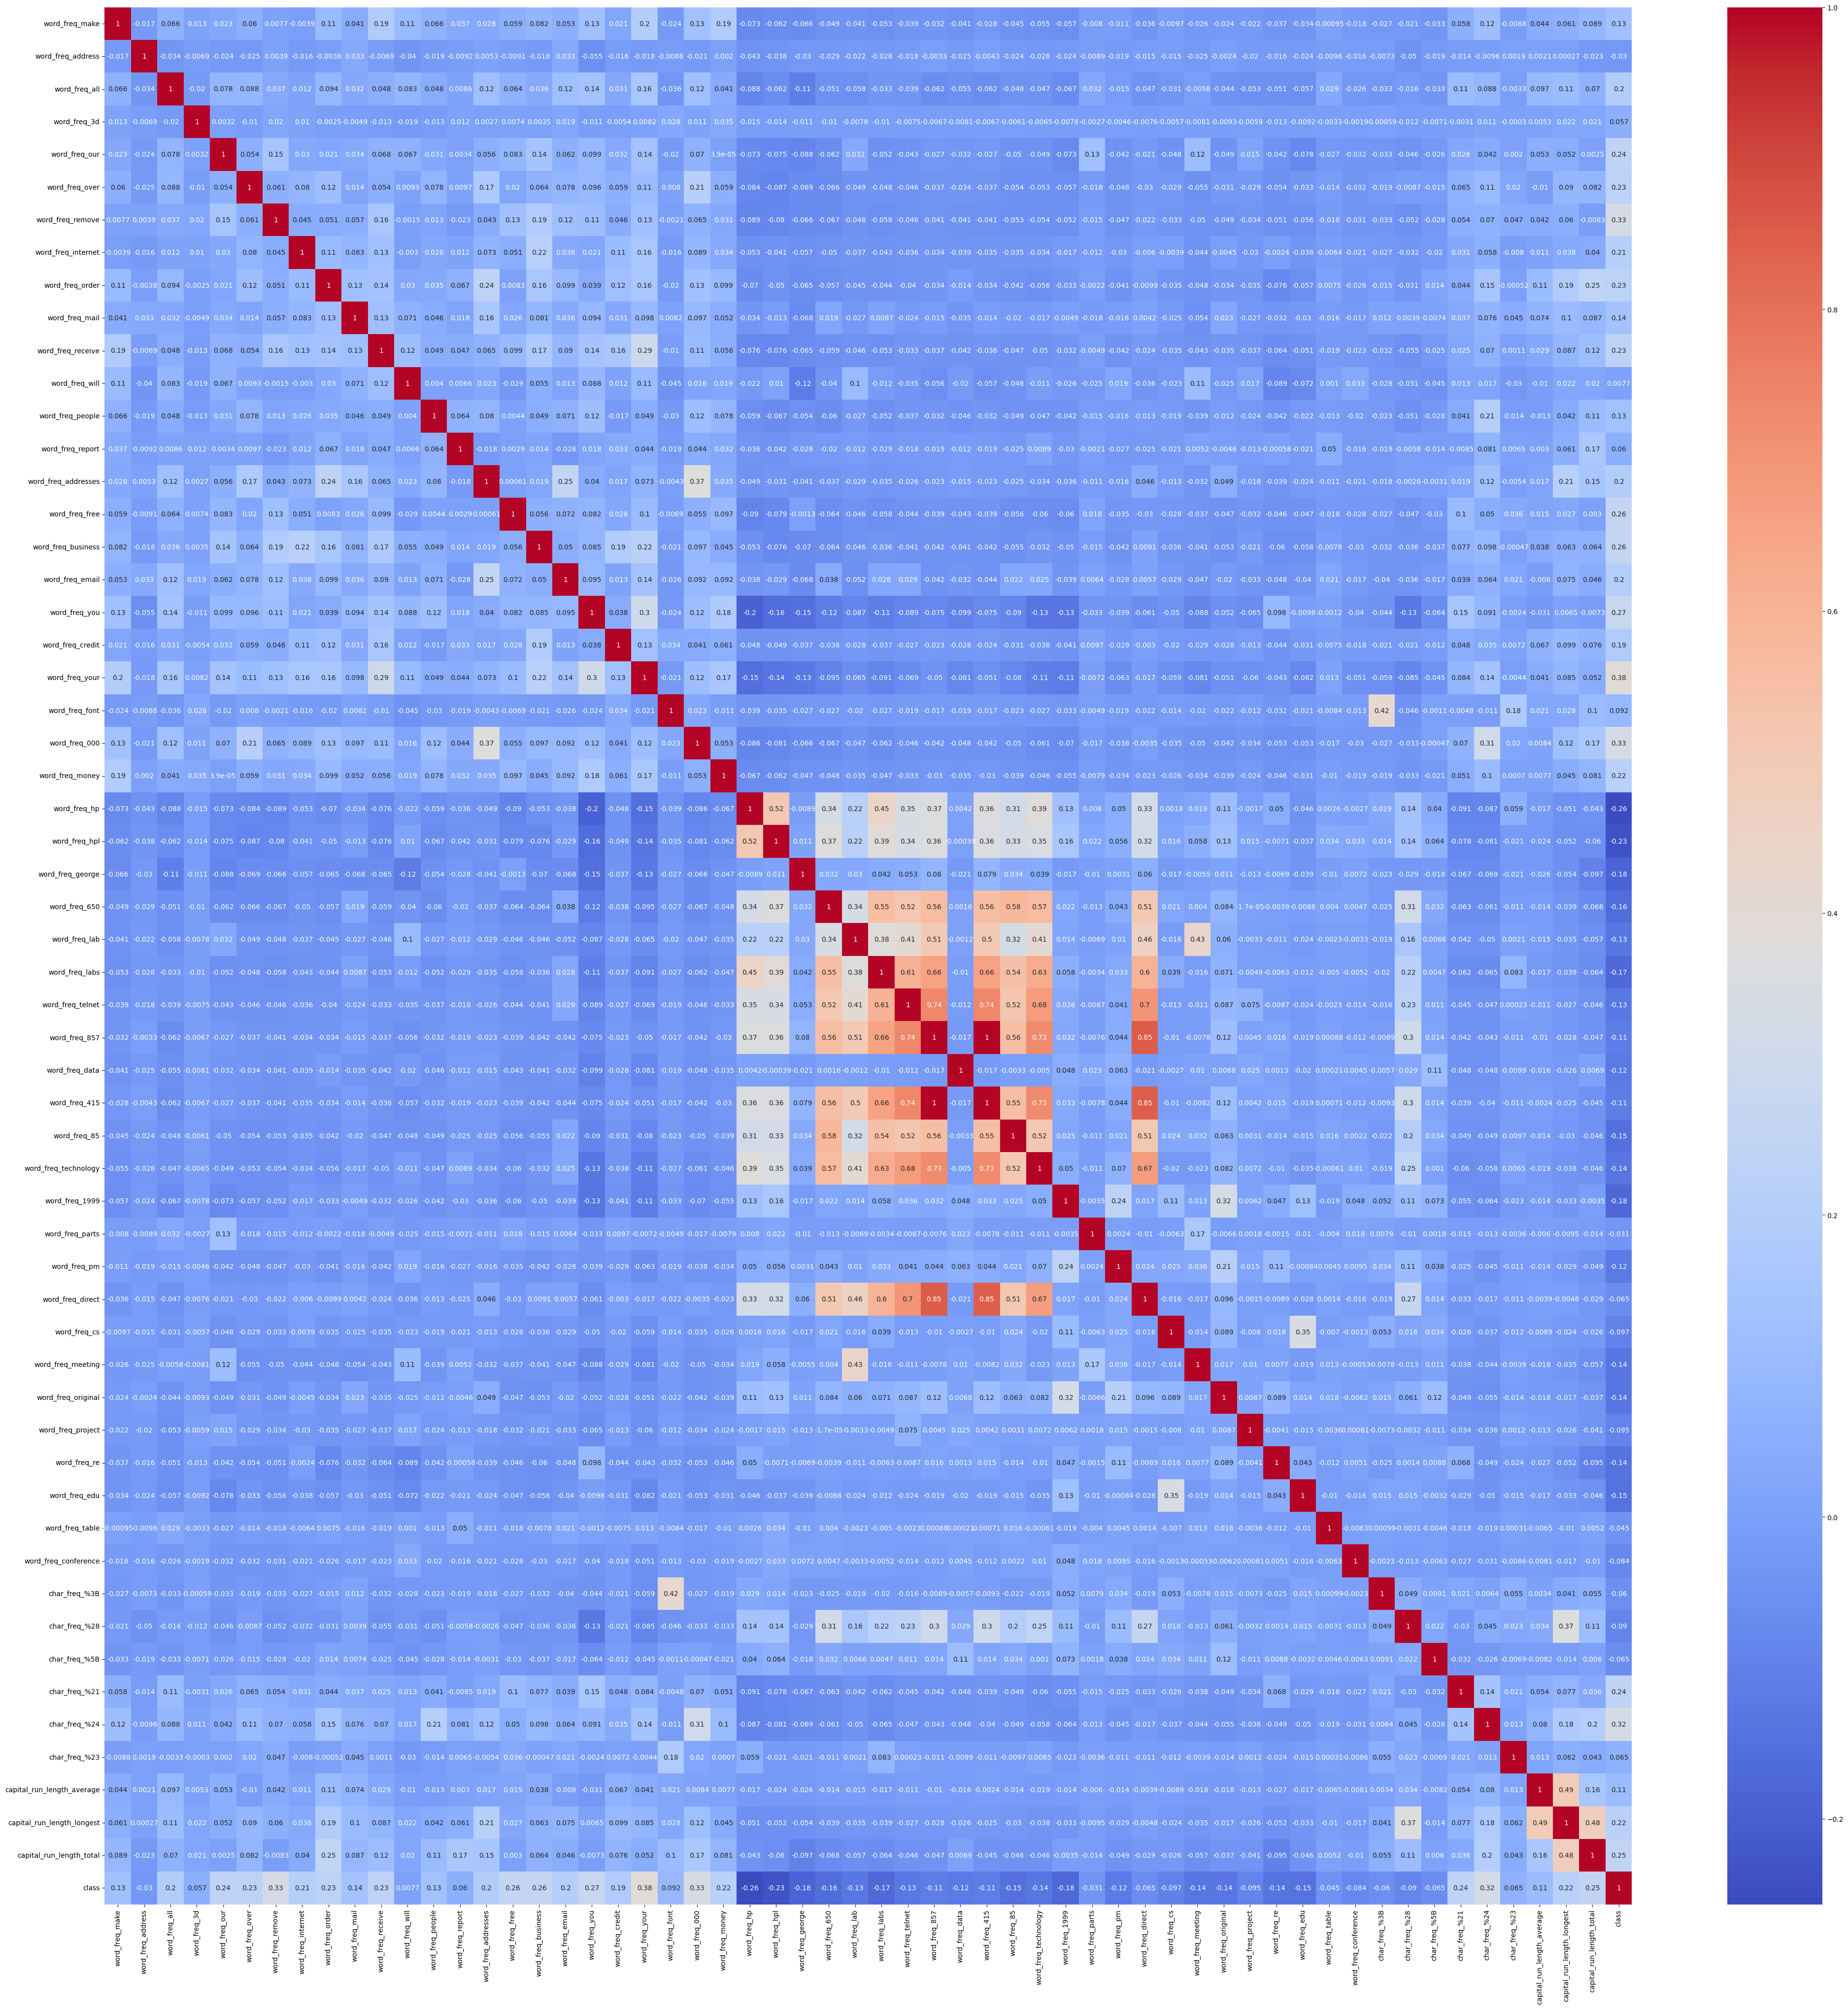

In [10]:
#Correlation Heatmap

plt.figure(figsize=(50,50))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [11]:
#Standardization

X = df.drop('class', axis=1)
y = df['class']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

df= pd.concat([X_scaled, y], axis=1)

print(df.head())


   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0       -0.342434           0.330885       0.712859       -0.0469   
1        0.345359           0.051909       0.435130       -0.0469   
2       -0.145921          -0.165072       0.851723       -0.0469   
3       -0.342434          -0.165072      -0.556761       -0.0469   
4       -0.342434          -0.165072      -0.556761       -0.0469   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0       0.011565       -0.350266         -0.291794           -0.262562   
1      -0.256117        0.672399          0.244743           -0.088010   
2       1.364846        0.343685          0.193644            0.036670   
3       0.472573       -0.350266          0.500237            1.308402   
4       0.472573       -0.350266          0.500237            1.308402   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0        -0.323302       -0.371364  ...      -0.158453      -0.5143

In [12]:
print(df.head())
df['class'].unique()

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0       -0.342434           0.330885       0.712859       -0.0469   
1        0.345359           0.051909       0.435130       -0.0469   
2       -0.145921          -0.165072       0.851723       -0.0469   
3       -0.342434          -0.165072      -0.556761       -0.0469   
4       -0.342434          -0.165072      -0.556761       -0.0469   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0       0.011565       -0.350266         -0.291794           -0.262562   
1      -0.256117        0.672399          0.244743           -0.088010   
2       1.364846        0.343685          0.193644            0.036670   
3       0.472573       -0.350266          0.500237            1.308402   
4       0.472573       -0.350266          0.500237            1.308402   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0        -0.323302       -0.371364  ...      -0.158453      -0.5143

array([1, 0], dtype=int64)

Best Hyperparameters: {'C': 10, 'gamma': 0.01}

Baseline Metrics: {'Accuracy': 0.9272529858849077, 'Precision': 0.9277456647398844, 'Recall': 0.8842975206611571, 'F1': 0.9055007052186178}
Tuned Metrics: {'Accuracy': 0.9261672095548317, 'Precision': 0.9300291545189504, 'Recall': 0.8787878787878788, 'F1': 0.9036827195467422}


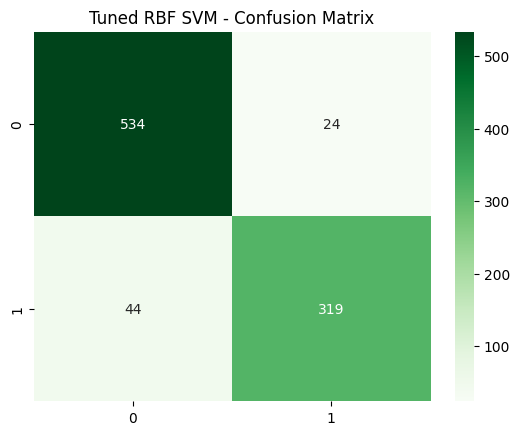

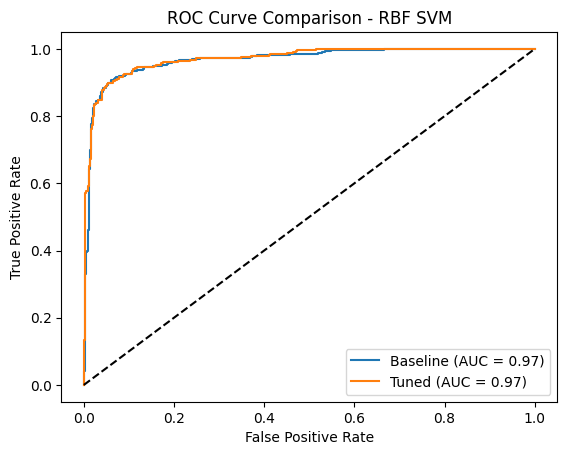

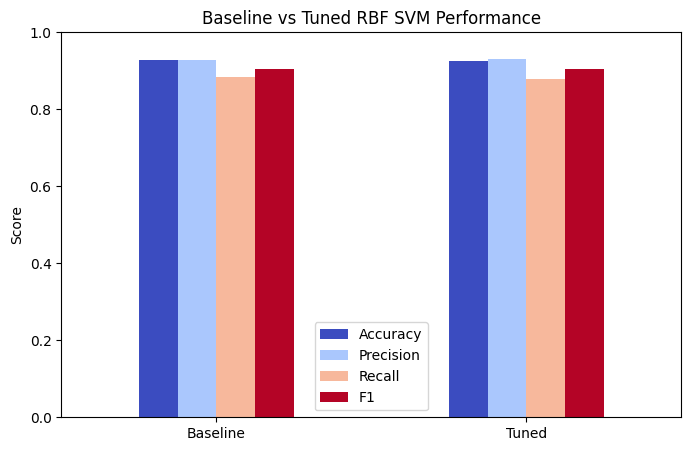

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# ----------------
# Baseline RBF SVM
# ----------------
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_base = svm_rbf.predict(X_test)
y_prob_base = svm_rbf.predict_proba(X_test)[:, 1]

base_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_base),
    "Precision": precision_score(y_test, y_pred_base),
    "Recall": recall_score(y_test, y_pred_base),
    "F1": f1_score(y_test, y_pred_base)
}

# ----------------
# Hyperparameter Tuning (FAST)
# ----------------
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1]
}

grid = GridSearchCV(
    SVC(kernel='rbf', probability=False, random_state=42),  # probability=False for speed
    param_grid,
    scoring='accuracy',
    cv=3,  # fewer folds for speed
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)

# Retrain best model with probability=True for ROC curve
best_svm_rbf = SVC(
    kernel='rbf',
    C=grid.best_params_['C'],
    gamma=grid.best_params_['gamma'],
    probability=True,
    random_state=42
)
best_svm_rbf.fit(X_train, y_train)
y_pred_tuned = best_svm_rbf.predict(X_test)
y_prob_tuned = best_svm_rbf.predict_proba(X_test)[:, 1]

tuned_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_tuned),
    "Precision": precision_score(y_test, y_pred_tuned),
    "Recall": recall_score(y_test, y_pred_tuned),
    "F1": f1_score(y_test, y_pred_tuned)
}

print("\nBaseline Metrics:", base_metrics)
print("Tuned Metrics:", tuned_metrics)

# ----------------
# Confusion Matrix for Tuned Model
# ----------------
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Tuned RBF SVM - Confusion Matrix")
plt.show()

# ----------------
# ROC Curve Comparison
# ----------------
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_base)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)

plt.plot(fpr_base, tpr_base, label='Baseline (AUC = {:.2f})'.format(auc(fpr_base, tpr_base)))
plt.plot(fpr_tuned, tpr_tuned, label='Tuned (AUC = {:.2f})'.format(auc(fpr_tuned, tpr_tuned)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - RBF SVM')
plt.legend()
plt.show()

# ----------------
# Bar Chart Comparison
# ----------------
metrics_df = pd.DataFrame([base_metrics, tuned_metrics], index=["Baseline", "Tuned"])
metrics_df.plot(kind='bar', figsize=(8, 5), colormap='coolwarm')
plt.title("Baseline vs Tuned RBF SVM Performance")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()


In [14]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
